# Titanic - Machine Learning from Disaster

![title](header.png)

Required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's start by importing the train and test data...

In [2]:
# Load the data sets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Let's analyze the data from the training set

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Missing values for the variables 'Age', 'Cabin' and 'Embarked'

In [5]:
# Calcular a média de idade em função de 'Pclass'e 'Sex' (train_data e test_data)
for dataset in [train_data, test_data]:
    age_mean = dataset['Age'].median()
    dataset['Age'] = dataset['Age'].fillna(age_mean)
# -------------------------------------------------------------------------

# Encontrar a moda da coluna 'Embarked'
moda_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(moda_embarked)

# -------------------------------------------------------------------------

fare_mean = dataset['Fare'].median()
test_data['Fare'] = test_data['Fare'].fillna(fare_mean)

In [6]:
# Função para extrair o pronome do nome
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Name'].apply(extract_title)

In [7]:
train_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [8]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [10]:
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

Parece que os títulos 'Mr', 'Miss', 'Mrs', 'Master', 'Dr' e 'Rev' são os mais comuns. Criaremos um quinto grupo para todos os demais títulos denominado 'NT'

In [11]:
def corrigir_title(title):
    # Lista de títulos aceitáveis
    titulos_aceitaveis = ['Mr', 'Miss', 'Mrs', 'Master']
    # Verificar se o título atual está na lista de aceitáveis
    if title in titulos_aceitaveis:
        return title
    else:
        return 'Others'

# Aplicar a função à coluna 'Title'
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Title'].apply(corrigir_title)

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [14]:
for dataset in [train_data, test_data]:
    dataset.drop(columns='Name', inplace=True)
    dataset.drop(columns='Ticket', inplace=True)
    dataset.drop(columns='Cabin', inplace=True)

train_data.drop(columns='PassengerId', inplace=True)

In [15]:
# create 'FamilySize'
for dataset in [train_data, test_data]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# create 'IsAlone'
for dataset in [train_data, test_data]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

# create 'IsMother'
for dataset in [train_data, test_data]:
    dataset['IsMother'] = 0
    dataset.loc[(dataset['Sex'] =='female') & (dataset['Parch'] > 0) & (dataset['Age'] > 20),'IsMother'] = 1

# create 'IsMr'
for dataset in [train_data, test_data]:
    dataset['IsMr'] = 0
    dataset.loc[dataset['Title'] == 'Mr', 'IsMr'] = 1

# create 'IsElderly'
for dataset in [train_data, test_data]:
    dataset['IsElderly'] = 0
    dataset.loc[dataset['Age'] >= 65, 'IsElderly'] = 1

# create 'AgeGroup'
def create_age_group(dataset):
    # Arredonda a idade para o inteiro mais próximo
    dataset['Age'] = np.round(dataset['Age'])
    # Define os intervalos de idade
    bins = np.arange(0, dataset['Age'].max() + 5, 5)
    # Cria os labels para os intervalos
    labels = [f"{i}-{i + 4}" for i in bins[:-1]]
    # Cria a coluna 'AgeGroup' usando cut para categorizar a idade
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

for dataset in [train_data, test_data]:
    create_age_group(dataset)

# create FareGroup
def create_fare_group(dataset):
    # Define os intervalos de tarifa
    bins = np.arange(0, dataset['Fare'].max() + 50, 50)
    # Cria os labels para os intervalos
    labels = [f"{i}-{i + 49}" for i in bins[:-1]]
    # Cria a coluna 'FareGroup' usando cut para categorizar a tarifa
    dataset['FareGroup'] = pd.cut(dataset['Fare'], bins=bins, labels=labels, right=False)

# Aplicar a função a ambos os datasets
for dataset in [train_data, test_data]:
    create_fare_group(dataset)

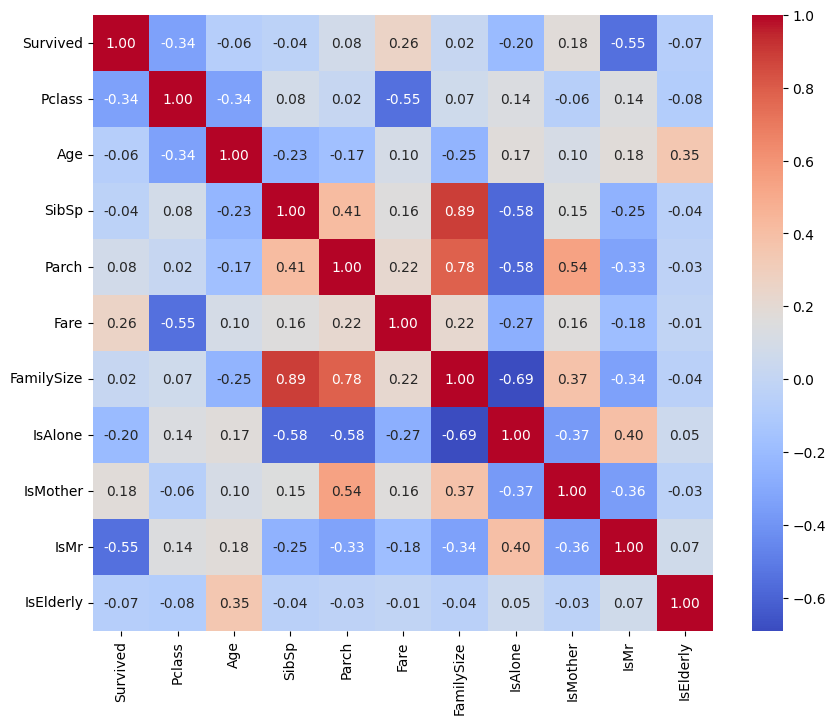

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.select_dtypes(include=np.number).corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

In [ ]:
def criar_graficos(df):
    # Configurando o ambiente de plotagem
    sns.set(style="ticks")
    
    # Selecionar variáveis numéricas
    num_vars = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Configurar o número de gráficos e sua disposição
    n_vars = len(num_vars)
    n_cols = 4
    n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula o número necessário de linhas de gráficos
    
    # Criar um FacetGrid para plotar histogramas separados por 'Sex' e 'Survived'
    for var in num_vars:
        plt.figure(figsize=(6.4, 4.8))
        g = sns.FacetGrid(df, col="Sex", row="Survived", height=4, aspect=1, margin_titles=True)
        g.map(plt.hist, var, bins=15, color='steelblue', alpha=0.6)
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(f'Distribution of {var} by Sex and Survived')
        g.add_legend()
    plt.show()

# Testando a função com dados de treino
print("\nGráficos - Treino:")
criar_graficos(train_data)

## Gradient Boosting Classifier

Classificação Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       549
           1       0.96      0.94      0.95       342

    accuracy                           0.96       891
   macro avg       0.96      0.96      0.96       891
weighted avg       0.96      0.96      0.96       891

Acurácia: 0.9618406285072951
Log Loss: 1.3754031596296108
ROC-AUC Score: 0.9956832731494797


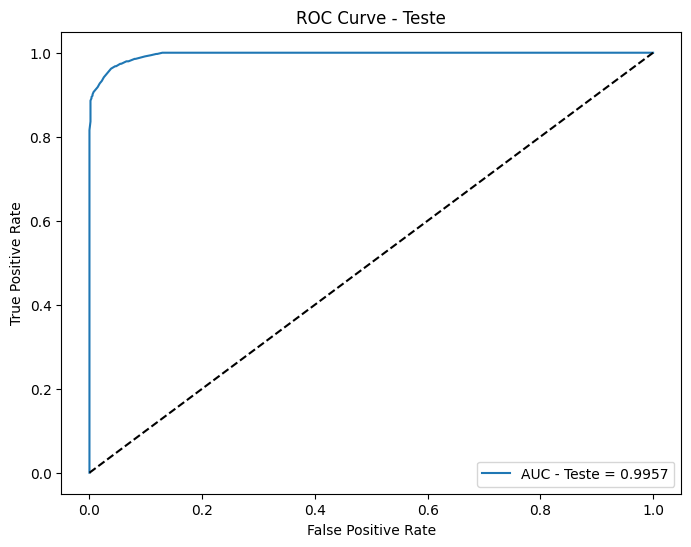

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Preparar características e alvo
y = train_data['Survived']
X = train_data.drop(['Survived'], axis=1)

# Dividir os dados em treino e teste
# X, X, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

# Definindo as colunas numéricas e categóricas
numeric_features = ['SibSp', 'Parch', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'AgeGroup', 'IsMr', 'IsAlone']

# Criando o transformador para as variáveis numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinando os transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Criando o pipeline com o preprocessador e o modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingClassifier(
                               n_estimators = 100, 
                               learning_rate = 1.0, 
                               random_state = 0))])

# Treinando o modelo
pipeline.fit(X, y)

# Avaliação no conjunto de treino
y_pred_test = pipeline.predict(X)
y_pred_proba_test = pipeline.predict_proba(X)[:, 1]

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y, y_pred_test))
print("Acurácia:", accuracy_score(y, y_pred_test))
print("Log Loss:", log_loss(y, y_pred_test))
print("ROC-AUC Score:", roc_auc_score(y, y_pred_proba_test))

# Plot da Curva ROC
fpr_test, tpr_test, _ = roc_curve(y, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_score(y, y_pred_proba_test):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

## Random Forest

Classificação Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       549
           1       0.96      0.94      0.95       342

    accuracy                           0.96       891
   macro avg       0.96      0.96      0.96       891
weighted avg       0.96      0.96      0.96       891

Acurácia: 0.9618406285072951
Log Loss: 1.3754031596296108
ROC-AUC Score: 0.992796578574548


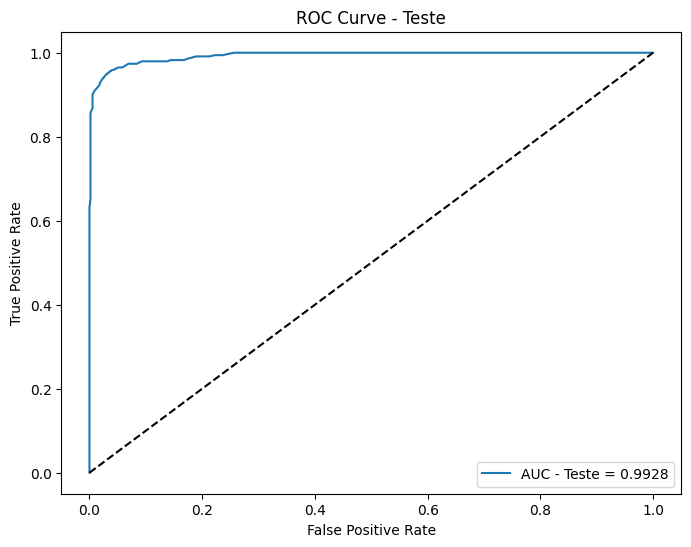

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Criar o pipeline final com o preprocessor e o classificador
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42))])

# Treinando o modelo
clf_rf.fit(X, y)

# Avaliação no conjunto de treino
y_pred_test = clf_rf.predict(X)
y_pred_proba_test = clf_rf.predict_proba(X)[:, 1]

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y, y_pred_test))
print("Acurácia:", accuracy_score(y, y_pred_test))
print("Log Loss:", log_loss(y, y_pred_test))
print("ROC-AUC Score:", roc_auc_score(y, y_pred_proba_test))

# Plot da Curva ROC
fpr_test, tpr_test, _ = roc_curve(y, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_score(y, y_pred_proba_test):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

## XGBoost

Classificação Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       549
           1       0.91      0.85      0.88       342

    accuracy                           0.91       891
   macro avg       0.91      0.90      0.91       891
weighted avg       0.91      0.91      0.91       891

Acurácia: 0.9113355780022446
Log Loss: 0.2506211110306465
ROC-AUC Score: 0.9632878492527616


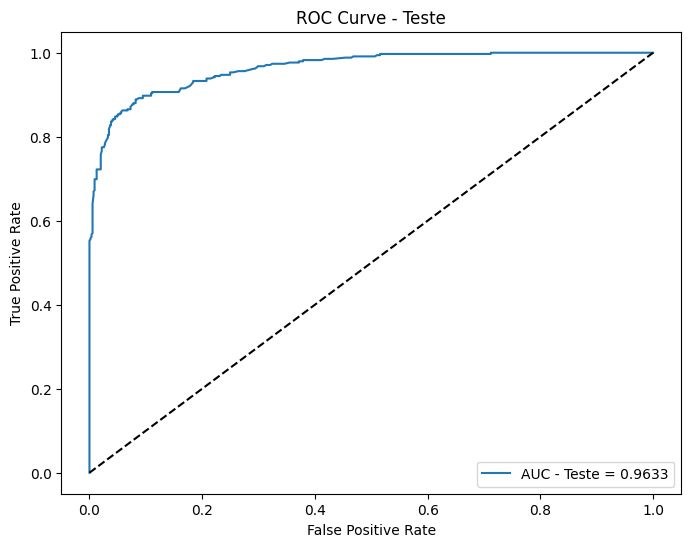

In [22]:
from xgboost import XGBClassifier

# Criar o pipeline final com o preprocessor e o classificador
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42))])

# Treinando o modelo
clf_xgb.fit(X, y)

# Avaliação no conjunto de treino
y_pred_test = clf_xgb.predict(X)
y_pred_proba_test = clf_xgb.predict_proba(X)[:, 1]

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y, y_pred_test))
print("Acurácia:", accuracy_score(y, y_pred_test))
print("Log Loss:", log_loss(y, clf_xgb.predict_proba(X)))
print("ROC-AUC Score:", roc_auc_score(y, y_pred_proba_test))

# Plot da Curva ROC
fpr_test, tpr_test, _ = roc_curve(y, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_score(y, y_pred_proba_test):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

## Decision Tree Classifier

Classificação Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       549
           1       0.98      0.92      0.95       342

    accuracy                           0.96       891
   macro avg       0.97      0.95      0.96       891
weighted avg       0.96      0.96      0.96       891

Acurácia: 0.9618406285072951
Log Loss: 0.07047059876568725
ROC-AUC Score: 0.996093375515291


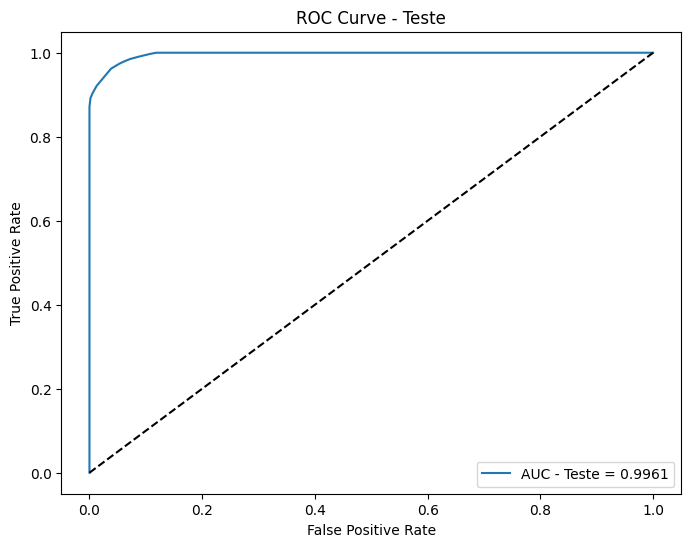

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Criar o pipeline final com o preprocessor e o classificador
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', DecisionTreeClassifier(random_state=0))])

# Treinando o modelo
clf_dt.fit(X, y)

# Avaliação no conjunto de treino
y_pred_test = clf_dt.predict(X)
y_pred_proba_test = clf_dt.predict_proba(X)[:, 1]

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y, y_pred_test))
print("Acurácia:", accuracy_score(y, y_pred_test))
print("Log Loss:", log_loss(y, clf_dt.predict_proba(X)))
print("ROC-AUC Score:", roc_auc_score(y, y_pred_proba_test))

# Plot da Curva ROC
fpr_test, tpr_test, _ = roc_curve(y, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_score(y, y_pred_proba_test):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

Estimating values for test_data with 'XGBoost'

In [24]:
test_data_predictions = clf_dt.predict(test_data)
test_data['Survived'] = test_data_predictions

Resultado final

In [25]:
test_data[['PassengerId', 'Survived']]

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_data.Survived})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Complete